# Homework 7

## Problem 1

Many LAs would appreciate hearing your feedback on where and how they improved and/or have more room for improvement. As a part of this assignment, take a few minutes to fill out this survey about how your LA did this quarter: http://tinyurl.com/W22-LA-Feedback

## Problem 2

This problem is based on the article 

> Obermeyer, Z., Powers, B., Vogeli, C., & Mullainathan, S. (2019). Dissecting racial bias in an algorithm used to manage the health of populations. *Science*, 366(6464), 447-453.

In this article, the authors use patient medical records, demographics, and insurance claims to study bias in a machine learning model used to predict patient risk. This model has been used to make recommendations about which patients should be admitted to more intensive care programs on the basis of their health. 

In this problem, you will replicate several of the qualitative findings from this study. 

The results presented in this article are discussed by Dr. Ruha Benjamin in the video "[Are We Automating Racism](https://www.youtube.com/watch?v=Ok5sKLXqynQ)". You are free to consult either the article or the video when completing this assignment. While doing so may be interesting, it is not likely to concretely help you in the problems below.




## Data Access

In order to protect patient privacy, the authors did not share the "real" data used in their study. Instead, they created a randomized version of the data that preserves many of the same patterns and trends. Run the cell below to access the data. I have also uploaded the CSV file directly to CCLE in case you have issues using this URL. 

In [1]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

There are 48,784 patients represented as rows in the data, and 160 pieces of information about each patient represented as columns. Run the code below to check this: 

In [2]:
df.shape

(48784, 160)

A few of the columns are going to be especially important in our analysis: 

- `risk_score_t` is the algorithm's risk score assigned to a given patient. 
- `cost_t` is the patient's medical costs in the study period. 
- `race` is the patient's self-reported race. The authors filtered the data to include only `white` and `black` patients. 
- `gagne_sum_t` is the total number of chronic illnesses presented by the patient during the study period. 
- `dem_female` is a patient sex indicator, with `1` indicating female patients and `0` indicating male patients. 

Run the code below to take a look at these columns. 

In [3]:
cols = ['risk_score_t', 'cost_t', 'gagne_sum_t','race',  'dem_female']
df[cols].head()

,risk_score_t,cost_t,gagne_sum_t,race,dem_female
0,1.987430,1200.0,0,white,0
1,7.677934,2600.0,3,white,1
2,0.407678,500.0,0,white,1
3,0.798369,1300.0,0,white,1
4,17.513165,1100.0,1,white,1


## Part A

Here's how the algorithm was used in the medical setting: 

> Patients with higher scores from the algorithm were more likely to be enrolled in “high-risk care management” programs. 

A high-risk care management program offers additional health resources to patients, including trained healthcare providers to help them manage complex health needs. In other words, 

> If you are very sick, getting a **high** score on the algorithm can help you receive **more** medical attention. 

One of the major findings of the study above was that the algorithm tended to give lower scores to Black patients, even when those Black patients were equally sick as White patients. In this part, you will replicate this finding. 

**Run the following cell to create this plot:** 

<figure class="image" style="width:70%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/risk1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

#### Key Points
- The plotted points correspond to *average* number of chronic conditions, *grouped by* risk score percentiles and demographic variables such as race and sex. 
- **The vertical axis gives the *percentile risk* of patients assigned by the algorithm, rounded to the nearest percentage point**. A patient in the 85th percentile, for example, received a risk score from the algorithm higher than 84% of all patients and lower than 15% of all patients. The raw risk score (not the percentile) of each patient is contained in the `risk_score_t` column. 
- **The horizontal axis gives the average number of chronic illnesses presented by patients in the corresponding risk percentile**. For example, White men in the 80th risk score percentile presented, on average, approximately two chronic illnesses. The number of chronic illnesses presented by a patient is contained in the `"gagne_sum_t"` column of the data. 
- Different colors segment Black and White patients (`race`). Two panels distinguish between male and female patients. The `dem_female` column gives the sex of each patient, with `0` representing male and `1` representing female.  

### What you need to do
Go through the code and fill in the blanks for the empty comments (with short sentences). In the last line, replace the empty strings with the appropriate strings. Besides the last line, you won't have to modify the code at all.

Seaborn is a great package for data visualization - if you're interested, you should check out https://seaborn.pydata.org/tutorial.html

[Text(0.5, 1.0, 'Female'),
 Text(0.5, 20.80000000000002, 'Mean number of chronic illnesses')]

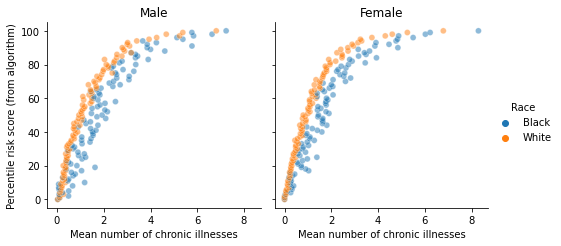

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# https://pandas.pydata.org/docs/reference/api/pandas.Series.rank.html
# calculate the risk score percentages, reset them in the range [0,100], and round them 
df["risk_score_pct"] = df["risk_score_t"].rank() / len(df)
df["rounded"] = (100*df["risk_score_pct"]).round()

# rename column "race" to "Race" and convert strings in the column "Race" to titlecase
df = df.rename(columns = {"race" : "Race"})
df["Race"] = df["Race"].str.title()

# calculate the average number of chronic illnesses of different groups grouped by percentile risk, race, and gender
grouped = df.groupby(["rounded", "Race", "dem_female"])[["gagne_sum_t"]].mean()

# look at the example plots in https://seaborn.pydata.org/generated/seaborn.relplot.html
# 
fig = sns.relplot(data = grouped, 
                  y = "rounded", 
                  x = "gagne_sum_t",  
                  hue = "Race", 
                  col = "dem_female", 
                  height = 3.5, 
                  alpha = 0.5)

fig.axes[0][0].set(title = "Male", 
                   ylabel = "Percentile risk score (from algorithm)",
                   xlabel = "Mean number of chronic illnesses")
fig.axes[0][1].set(title = "Female", 
                   xlabel = "Mean number of chronic illnesses")

## Part B

In no more than four sentences, describe the meaning of the plot you produced in Part A. For example, suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program? 

**From the plot, we can observe that the yellow plots are always vertically farther from the x-axis than the blue plots, which means that the percentile risk score of yellow plots are always greater than the ones of blue plots given the same number of chronic ilnesses. In other words, if two patients with different races have the same chronic illnesses, the white patient is more likely to be referred to the high-risk care management program.**


## Part C

Next, you'll perform an analysis to identify the source of this disparity in Black and White patients. You might imagine that the model was trained to base its risk scores on an "overall level of health" in the training data. However, it is very difficult to get data on such a concept. 

For this reason, the algorithm studied was trained instead using *total medical costs* as the target variable. That is: 

> The risk score an agent receives is a function of the model's prediction of the total medical costs which will be incurred by that individual. 

This is a superficially logical choice, since (a) total medical costs are generally correlated with health and (b) costs are regularly recorded in insurance claims data. 

In this problem, you'll use linear regression to estimate the difference in generated medical costs between White and Black patients in this data set, and comment on this result in the context of Part A and B. 

### What You Should Do

1. If you modified the data frame `df` in any way, you should re-run the code in which you load the data frame. 
2. Run the supplied cell in order to limit the columns in the data frame to the ones you will use in this analysis. 
3. The `race` column of the data is currently a string. Encode it using integer labels. 
4. Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 
5. Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. **Important**: you should do this using only one function call. 
6. Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
    - Training score: `0.12629789734544883`
    - Testing score: `0.12415443228313183`
7. Based these results, comment on whether you are concerned about overfitting. **Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 
8. Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
    - Coefficient of `race`: `579.9031747777375`. 
9. Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
    - State your estimate of the difference in medical costs between White and Black patients. 
    - Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 
    
    
***Note***: *The estimated cost disparity in the published paper is higher, over twice the result given here. This may reflect a methodological difference in their modeling or possibly be a byproduct of their data randomization.* 

#### Step 1

If you modified the data frame `df` in any way in Part A, you should run the code below to reload the data frame. 

In [5]:
# Step 1: run, do not modify
df = pd.read_csv(url)

#### Step 2

Run this cell in order to limit the columns in the data frame to the ones you will use in this analysis. 

In [6]:
# Step 2: run, do not modify
cols = ['cost_t',
        'race',
        'dem_female',
        'dem_age_band_18-24_tm1',
        'dem_age_band_25-34_tm1',
        'dem_age_band_35-44_tm1',
        'dem_age_band_45-54_tm1',
        'dem_age_band_55-64_tm1',
        'dem_age_band_65-74_tm1',
        'dem_age_band_75+_tm1',
        'alcohol_elixhauser_tm1',
        'anemia_elixhauser_tm1',
        'arrhythmia_elixhauser_tm1',
        'arthritis_elixhauser_tm1',
        'bloodlossanemia_elixhauser_tm1',
        'coagulopathy_elixhauser_tm1',
        'compdiabetes_elixhauser_tm1',
        'depression_elixhauser_tm1',
        'drugabuse_elixhauser_tm1',
        'electrolytes_elixhauser_tm1',
        'hypertension_elixhauser_tm1',
        'hypothyroid_elixhauser_tm1',
        'liver_elixhauser_tm1',
        'neurodegen_elixhauser_tm1',
        'obesity_elixhauser_tm1',
        'paralysis_elixhauser_tm1',
        'psychosis_elixhauser_tm1',
        'pulmcirc_elixhauser_tm1',
        'pvd_elixhauser_tm1',
        'renal_elixhauser_tm1',
        'uncompdiabetes_elixhauser_tm1',
        'valvulardz_elixhauser_tm1',
        'wtloss_elixhauser_tm1',
        'cerebrovasculardz_romano_tm1',
        'chf_romano_tm1',
        'dementia_romano_tm1',
        'hemiplegia_romano_tm1',
        'hivaids_romano_tm1',
        'metastatic_romano_tm1',
        'myocardialinfarct_romano_tm1',
        'pulmonarydz_romano_tm1',
        'tumor_romano_tm1',
        'ulcer_romano_tm1']

df = df[cols]

#### Step 3

The `race` column of the data is currently a string. Encode it using integer labels. 

In [7]:
# Step 3: your code here
df["race"][df["race"] == "white"] = 1
df["race"][df["race"] == "black"] = 0

/var/folders/5w/xp5z9h2n0nb3qkgfbvf7cxrm0000gn/T/ipykernel_50347/1378778141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["race"][df["race"] == "black"] = 0


#### Step 4

Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 

In [8]:
# Step 4: your code here
y = df["cost_t"]
X = df.drop(["cost_t"], axis=1)

#### Step 5

Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. 

**Important**: you should do this using only one function call. 


In [9]:
# Step 5: your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021)

#### Step 6

Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
- Training score: `0.12629789734544883`
- Testing score: `0.12415443228313183`

In [12]:
# Step 6: your code here
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training score: " + str(lr.score(X_train, y_train)))
print("Testing score: " + str(lr.score(X_test, y_test)))

Training score: 0.12629789734544883
Testing score: 0.12415443228313205


#### Step 7

Based the results above, comment on whether you are concerned about overfitting. 

**Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 

**The coefficient of determination scores indicate how will the model fits the data. A 0.126 score means that there is almost no linear relationship between X and y. Although the testing score is very low, but it is only 0.2% close to the training score. Thus, there is next to no overfitting problem.**

#### Step 8

Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the predictor data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
- Coefficient of `race`: `579.9031747777375`. 

In [13]:
# Step 8: your code here
print(lr.coef_[0])

579.9031747777343


#### Step 9

Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
- State your estimate of the difference in medical costs between White and Black patients. 
- Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 

**Since the value for "race" is only 0 or 1, the difference in medical cost between White and Black patients is equal to the coefficient, which is around 580 dollars. The disparities in medical costs may be a reason to the disparities in risk scores. In this case, Black patients with realtively lower medical scores will receive lower scores, which prevent them from being enrolled in the high-risk care management program.**

## Problem 3

Work on your project! Describe in a couple of sentences what your group has worked on so far and/or just put in a screenshot of something happening. You can also write down what the main challenges have been and if you need help. This part of HW is graded on completion.

**We have tried the linear regression model, but we still need to adjust the model since there were some overfitting problems**

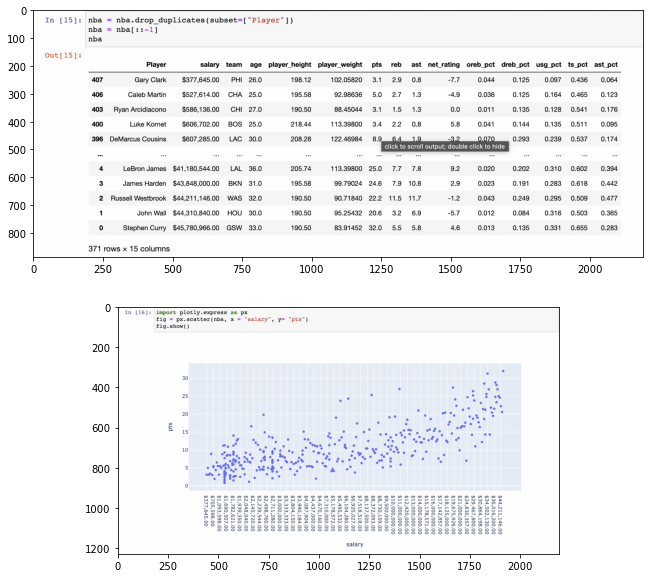

In [14]:
import matplotlib.image as mpimg
img_1 = mpimg.imread('data.jpg')
img_2 = mpimg.imread('plotly.jpg')
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].imshow(img_1)
ax[1].imshow(img_2)